# Group 35
# Code Flow

1. Importing Libraries and Data
2. Data Preprocessing
3. Answering Question 1
4. Answering Question 2/3


#### 1A) Importing Libraries

In [2]:
import numpy as np
import pandas as pd  # for data analytics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import csv
import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
import statsmodels.api as sm
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
from statsmodels.discrete.discrete_model import MNLogit 
from scipy import stats
from sklearn.preprocessing import StandardScaler

#### 1B) Importing data

In [5]:
# data loading
tablespreads_2022_data = pd.read_excel('IRI_POS_Tablespreads_2022.xlsx')
tablespreads_2021_data = pd.read_excel('IRI_POS_Tablespreads_2021.xlsx')
tablespreads_2020_data = pd.read_excel('IRI_POS_Tablespreads_2020.xlsx')
tablespreads_2019_data = pd.read_excel('IRI_POS_Tablespreads_2019.xlsx')
tablespreads_2018_data = pd.read_excel('IRI_POS_Tablespreads_2018.xlsx')

tablespreads_attribute_data = pd.read_excel('IRI_POS_Tablespreads_Product Attribute File.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'IRI_POS_Tablespreads_2022.xlsx'

#### 2) Data Preprocessing

In [6]:
#Adding Year Column to each dataset
tablespreads_2022_data['Year'] = "2022"
tablespreads_2021_data['Year'] = "2021"
tablespreads_2020_data['Year'] = "2020"
tablespreads_2019_data['Year'] = "2019"
tablespreads_2018_data['Year'] = "2018"

In [7]:
tablespreads_2022_data.head()

,Geography,Time,Product,UPC 13 digit,Dollar Sales No Merch,Dollar Sales Any Merch,Unit Sales No Merch,Unit Sales Any Merch,Volume Sales No Merch,Volume Sales Any Merch,...,Price per Volume Any Merch,ACV Weighted Distribution No Merch,ACV Weighted Distribution Any Merch,Base Unit Sales,Base Volume Sales,Base Dollar Sales,Incremental Units,Incremental Volume,Incremental Dollars,Year
0,Total US - Multi Outlet + Conv,Week Ending 04-10-22,BLUE BONNET RFG VEGETABLE OIL SPREAD BOX SPREA...,29000008222,1.088910e+06,146880.565443,937262.522463,131813.603009,937262.522463,131813.603009,...,1.114305,43.706176,4.402609,1.009909e+06,1.009909e+06,1.180254e+06,59166.887553,59166.887620,55536.766682,2022
1,Total US - Multi Outlet + Conv,Week Ending 04-10-22,BLUE BONNET RFG VEGETABLE OIL SPREAD BOX SPREA...,29000008563,4.490108e+04,10248.728577,38808.407025,8936.592409,38808.407025,8936.592409,...,1.146827,5.492362,1.014832,4.370129e+04,4.370129e+04,5.118342e+04,4043.705718,4043.705725,3966.379893,2022
2,Total US - Multi Outlet + Conv,Week Ending 04-10-22,BLUE BONNET RFG VEGETABLE OIL SPREAD INDIVDL W...,29000008252,5.817064e+04,3101.773105,23261.694744,1555.268466,46523.389488,3110.536932,...,0.997183,2.050543,0.068772,2.419815e+04,4.839631e+04,6.027251e+04,618.808218,1237.616440,999.899905,2022
3,Total US - Multi Outlet + Conv,Week Ending 04-10-22,BLUE BONNET RFG VEGETABLE OIL SPREAD PLASTIC T...,27000009002,2.324966e+05,12934.069323,117940.681316,7060.648479,110569.388734,6619.357949,...,1.953976,26.319175,1.711830,1.223989e+05,1.147489e+05,2.422413e+05,2602.458243,2439.804604,3189.355727,2022
4,Total US - Multi Outlet + Conv,Week Ending 04-10-22,BLUE BONNET RFG VEGETABLE OIL SPREAD PLASTIC T...,27000009301,3.622984e+04,282.533668,18824.140361,152.200069,17647.631589,142.687565,...,1.980086,6.243850,0.063546,1.896075e+04,1.777571e+04,3.648962e+04,15.587367,14.613157,22.748004,2022


In [8]:
#Joining all years datasets
Tablespreads_consolidated_data = pd.concat([tablespreads_2022_data,
                       tablespreads_2021_data,
                       tablespreads_2020_data,
                       tablespreads_2019_data,
                       tablespreads_2018_data])

In [9]:
Tablespreads_consolidated_data.shape

(1316655, 26)

In [10]:
#Dropping duplicate columns
tablespreads_attribute_datanew = tablespreads_attribute_data.drop(columns=['Time', 'Geography'])

tablespreads_attribute_datanew.columns

Index(['Product', 'UPC 13 digit', 'CAG Major Brand Value',
       'CAG Manufacturer Value', 'Sub-Category Name', 'CAG Category Value',
       'CAG Count Value', 'CAG Ounces Value', 'CAG Form Value', 'Form',
       'CAG Tier Value'],
      dtype='object')

In [11]:
#joining consolidated data and product attribute on UPC 13 digit
Tablespreads_join = pd.merge(Tablespreads_consolidated_data, tablespreads_attribute_datanew, how = 'left', on = 'UPC 13 digit')

In [12]:
# Creating Total Dollar and Sales Volume columns
Tablespreads_join['Total Unit Sales'] = Tablespreads_join['Base Unit Sales'] + Tablespreads_join['Incremental Units']
Tablespreads_join['Total Volume Sales'] = Tablespreads_join['Base Volume Sales'] + Tablespreads_join['Incremental Volume']
Tablespreads_join['Total Dollar Sales'] = Tablespreads_join['Base Dollar Sales'] + Tablespreads_join['Incremental Dollars']

In [13]:
Tablespreads_join.dtypes

Geography                               object
Time                                    object
Product_x                               object
UPC 13 digit                             int64
Dollar Sales No Merch                  float64
Dollar Sales Any Merch                 float64
Unit Sales No Merch                    float64
Unit Sales Any Merch                   float64
Volume Sales No Merch                  float64
Volume Sales Any Merch                 float64
Price per Unit                         float64
Price per Unit No Merch                float64
Price per Unit Any Merch               float64
Price per Volume                       float64
Price per Volume No Merch              float64
Price per Volume Any Merch             float64
ACV Weighted Distribution No Merch     float64
ACV Weighted Distribution Any Merch    float64
Base Unit Sales                        float64
Base Volume Sales                      float64
Base Dollar Sales                      float64
Incremental U

In [14]:
Tablespreads_join.shape

(1316655, 39)

In [15]:
# Filtering total US data
filtered_Tablespreads_join = Tablespreads_join.loc[Tablespreads_join['Geography']!='Total US - Multi Outlet + Conv']

In [16]:
# Grouping data and identifying total quantity
filtered_Tablespreads_grouped = filtered_Tablespreads_join.groupby(['Geography', 'CAG Manufacturer Value', 'CAG Tier Value', 'CAG Form Value', 'Year']).\
agg({'Total Dollar Sales': 'sum', 'Total Volume Sales': 'sum', 'Total Unit Sales': 'sum'})

filtered_Tablespreads_grouped.reset_index()

,Geography,CAG Manufacturer Value,CAG Tier Value,CAG Form Value,Year,Total Dollar Sales,Total Volume Sales,Total Unit Sales
0,California - IRI Standard - Multi Outlet + Conv,ABBEY SPECIALTY FOODS LLC,SUPER PREMIUM,ALL OTHER FORM,2021,457.885459,39.546354,79.092709
1,California - IRI Standard - Multi Outlet + Conv,ABBEY SPECIALTY FOODS LLC,SUPER PREMIUM,ALL OTHER FORM,2022,521.603508,46.062160,92.124319
2,California - IRI Standard - Multi Outlet + Conv,ABBEY SPECIALTY FOODS LLC,SUPER PREMIUM,STICKS,2021,1358.687236,118.686088,237.372175
3,California - IRI Standard - Multi Outlet + Conv,ABBEY SPECIALTY FOODS LLC,SUPER PREMIUM,STICKS,2022,644.742897,61.505090,123.010180
4,California - IRI Standard - Multi Outlet + Conv,AL HALOUB MFG CORP,SUPER PREMIUM,TUBS,2018,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
6809,West - IRI Standard - Multi Outlet + Conv,WORLD CHEESE CO INC,MAINSTREAM,STICKS,2018,0.000000,0.000000,0.000000
6810,West - IRI Standard - Multi Outlet + Conv,WORLD CHEESE CO INC,MAINSTREAM,STICKS,2019,0.000000,0.000000,0.000000
6811,West - IRI Standard - Multi Outlet + Conv,WORLD CHEESE CO INC,MAINSTREAM,STICKS,2022,0.000000,0.000000,0.000000
6812,West - IRI Standard - Multi Outlet + Conv,WORLD CHEESE CO INC,SUPER PREMIUM,TUBS,2021,0.000000,0.000000,0.000000


# Question 1

In [144]:
import numpy as np
import pandas as pd  # for data analytics
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [330]:
Dummydata=pd.read_csv(r"C:\Users\tpiku\Downloads\Final_Table.csv")

In [331]:
Dummydata.reset_index()
Dummy_upd = Dummydata.reset_index()




Dummy_upd['Form_upd'] = np.select([Dummy_upd['CAG Form Value'] =='STICKS', 
                                   Dummy_upd['CAG Form Value'] == 'TUBS', 
                                   Dummy_upd['CAG Form Value'] == 'SPRAY/SQUEEZE', 
                                   Dummy_upd['CAG Form Value'] == 'ALL OTHER FORM'], 
                                  [ 0, 1, 2, 3 ], default=4)

Dummy_upd['SubCat_upd'] = np.select([Dummy_upd['Sub-Category Name'] == 'RFG BUTTER',
                                     Dummy_upd['Sub-Category Name'] == 'MARGARINE/SPREADS',
                                     Dummy_upd['Sub-Category Name'] == 'RFG BUTTER BLENDS',
                                     Dummy_upd['Sub-Category Name'] == 'RFG FLAVORED MILK'], 
                                    [ 0, 1, 2, 3 ], default=4)

Dummy_upd['Geo_upd'] = np.select([Dummy_upd['Geography'] =='Northeast - IRI Standard - Multi Outlet + Conv', 
                                           Dummy_upd['Geography'] == 'Southeast - IRI Standard - Multi Outlet + Conv', 
                                           Dummy_upd['Geography'] == 'California - IRI Standard - Multi Outlet + Conv',
                                            Dummy_upd['Geography'] == 'Great Lakes - IRI Standard - Multi Outlet + Conv',
                                            Dummy_upd['Geography']=='Mid-South - IRI Standard - Multi Outlet + Conv',
                                            Dummy_upd['Geography']=='Plains - IRI Standard - Multi Outlet + Conv',
                                            Dummy_upd['Geography']=='South Central - IRI Standard - Multi Outlet + Conv',
                                            Dummy_upd['Geography']=='West - IRI Standard - Multi Outlet + Conv'], 
                                            [ 0, 1, 2, 3, 4, 5, 6, 7], default=8)

Dummy_upd['Tier_value_upd'] = np.select([Dummy_upd['CAG Tier Value'] =='MAINSTREAM', 
                                           Dummy_upd['CAG Tier Value'] == 'PREMIUM', 
                                           Dummy_upd['CAG Tier Value'] == 'SUPER PREMIUM',
                                            Dummy_upd['CAG Tier Value'] == 'VALUE'], 
                                            [ 0, 1, 2, 3 ], default=4)

In [332]:
Dummy_upd= Dummy_upd.rename(columns={'Total Unit Sales': 'Total_Unit_Sales'})
Dummy_upd=Dummy_upd.rename(columns={'Base Unit Sales': 'Base_Unit_Sale'})
Dummy_upd=Dummy_upd.rename(columns={'CAG Tier Value': 'CAG_Tier_value'})
Dummy_upd=Dummy_upd.rename(columns={'Price per Unit': 'Price_per_unit'})
Dummy_upd=Dummy_upd.rename(columns={'Total Dollar Sales': 'Total_Dollar_Sales'})

In [333]:
#Subset Data for only Conagra
Dummy_upd_Conagra = Dummy_upd.loc[Dummy_upd['CAG Manufacturer Value'] == 'CONAGRA BRANDS']

In [343]:
#Subset Data for Top 5 Brands
Dummy_upd_Top5 = Dummy_upd[Dummy_upd['CAG Manufacturer Value'].isin
                           (['CONAGRA BRANDS',"LAND O'LAKES INC", 'UPFIELD', 'ORNUA', 'CHALLENGE DAIRY PRODUCTS INC'])]

# Q1 First Regression: Conagra Only

In [327]:
Dummy_upd_Conagra.reset_index()
import statsmodels.api as sm
# Define the categorical variables and their reference categories
Dummy_upd_Conagra.loc[:, 'Form_upd'] = pd.Categorical(Dummy_upd_Conagra['Form_upd'], categories=[0, 1, 2, 3], ordered=True)
Dummy_upd_Conagra.loc[:, 'SubCat_upd'] = pd.Categorical(Dummy_upd_Conagra['SubCat_upd'], categories=[0, 1, 2, 3], ordered=True)
Dummy_upd_Conagra.loc[:, 'Tier_value_upd'] = pd.Categorical(Dummy_upd_Conagra['Tier_value_upd'], categories=[0, 1, 2, 3], ordered=True)
Dummy_upd_Conagra.loc[:, 'Geo_upd'] = pd.Categorical(Dummy_upd_Conagra['Geo_upd'], categories=[0, 1, 2, 3, 4,5,6,7], ordered=True)

Dummy_upd_Conagra.loc[:, 'SubCat_upd'] = Dummy_upd_Conagra['SubCat_upd'].cat.rename_categories(['RFG BUTTER', 'MARGERINE/SPREADS', 'BUTTERBLEND', 'BUTTER MILK'])
Dummy_upd_Conagra.loc[:, 'Form_upd'] = Dummy_upd_Conagra['Form_upd'].cat.rename_categories(['STICK', 'TUB', 'SPRAY/SQUEEZE', 'ALL OTHER FORMS'])
Dummy_upd_Conagra.loc[:, 'Tier_value_upd'] = Dummy_upd_Conagra['Tier_value_upd'].cat.rename_categories(['MAINSTREAM', 'PREMIUM', 'SUPER PREMIUM', 'VALUE'])
Dummy_upd_Conagra.loc[:, 'Geo_upd'] = Dummy_upd_Conagra['Geo_upd'].cat.rename_categories(['Northeast', 'Southeast', 'California', 'Great lakes', 'Mid-South', 'Plains', 'South Central', 'West'])


# Fit the   with the specified predictors and reference categories
model2 = sm.formula.glm('Total_Unit_Sales ~ Price_per_unit + np.power(Price_per_unit, 2) + Form_upd + Geo_upd + Geo_upd:Form_upd', 
                       data=Dummy_upd_Conagra, family=sm.families.Gaussian()).fit()

# Print the model summary
print(model2.summary())

C:\Users\tpiku\AppData\Local\Temp\ipykernel_38816\1828184091.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dummy_upd_Conagra.loc[:, 'Form_upd'] = pd.Categorical(Dummy_upd_Conagra['Form_upd'], categories=[0, 1, 2, 3], ordered=True)
C:\Users\tpiku\AppData\Local\Temp\ipykernel_38816\1828184091.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dummy_upd_Conagra.loc[:, 'SubCat_upd'] = pd.Categorical(Dummy_upd_Conagra['SubCat_upd'], categories=[0, 1, 2, 3], ordered=True)
C:\Users\tpiku\AppData\Local\Temp\

                 Generalized Linear Model Regression Results                  
Dep. Variable:       Total_Unit_Sales   No. Observations:                70825
Model:                            GLM   Df Residuals:                    70791
Model Family:                Gaussian   Df Model:                           33
Link Function:               identity   Scale:                      1.8151e+08
Method:                          IRLS   Log-Likelihood:            -7.7391e+05
Date:                Tue, 09 May 2023   Deviance:                   1.2850e+13
Time:                        14:11:57   Pearson chi2:                 1.28e+13
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9969
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [283]:
sales_sum = Dummy_upd_Conagra.groupby('Form_upd')['Total_Unit_Sales'].sum()

# Print the sum of total dollar sales for each CAG form type
print(sales_sum)

Form_upd
STICK              8.051891e+07
TUB                3.631055e+08
SPRAY/SQUEEZE      6.428515e+07
ALL OTHER FORMS    3.443651e+08
Name: Total_Unit_Sales, dtype: float64


In [282]:
avg_price_per_unit = Dummy_upd_Conagra.groupby('Form_upd')['Price_per_unit'].mean()

# Print the average price per unit for each CAG form type
print(avg_price_per_unit)

Form_upd
STICK              2.879012
TUB                4.007480
SPRAY/SQUEEZE      2.573604
ALL OTHER FORMS    1.356000
Name: Price_per_unit, dtype: float64


In [289]:
sales_sum2 = Dummy_upd_Top5.groupby('Form_upd')['Total_Unit_Sales'].sum()

# Print the sum of total dollar sales for each CAG form type
print(sales_sum2)

Form_upd
STICK              1.684448e+09
TUB                1.951368e+09
SPRAY/SQUEEZE      1.244245e+08
ALL OTHER FORMS    5.057371e+08
Name: Total_Unit_Sales, dtype: float64


In [290]:
avg_price_per_unit2 = Dummy_upd_Top5.groupby('Form_upd')['Price_per_unit'].mean()

# Print the average price per unit for each CAG form type
print(avg_price_per_unit2)

Form_upd
STICK              3.880501
TUB                3.927448
SPRAY/SQUEEZE      3.048660
ALL OTHER FORMS    3.565253
Name: Price_per_unit, dtype: float64


# Q1 Second Regression: Top 5 Brands

In [344]:
Dummy_upd.reset_index()
import statsmodels.api as sm
# Define the categorical variables and their reference categories
Dummy_upd_Top5['Form_upd'] = pd.Categorical(Dummy_upd_Top5['Form_upd'], categories=[0, 1, 2, 3], ordered=True)
Dummy_upd_Top5['SubCat_upd'] = pd.Categorical(Dummy_upd_Top5['SubCat_upd'], categories= [ 0, 1, 2, 3 ], ordered=True)
Dummy_upd_Top5['Tier_value_upd'] = pd.Categorical(Dummy_upd_Top5['Tier_value_upd'], categories= [ 0, 1, 2, 3 ], ordered=True)
Dummy_upd_Top5['Geo_upd'] = pd.Categorical(Dummy_upd_Top5['Geo_upd'], categories=[0, 1, 2, 3, 4,5,6,7], ordered=True)

Dummy_upd_Top5['SubCat_upd'] = Dummy_upd_Top5['SubCat_upd'].cat.rename_categories(['RFG BUTTER', 'MARGERINE/SPREADS', 'BUTTERBLEND', 'BUTTER MILK'])
Dummy_upd_Top5['Form_upd'] = Dummy_upd_Top5['Form_upd'].cat.rename_categories(['STICK', 'TUB', 'SPRAY/SQUEEZE', 'ALL OTHER FORMS'])
Dummy_upd_Top5['Tier_value_upd'] = Dummy_upd_Top5['Tier_value_upd'].cat.rename_categories(['MAINSTREAM', 'PREMIUM', 'SUPER PREMIUM', 'VALUE'])
Dummy_upd_Top5['Geo_upd'] = Dummy_upd_Top5['Geo_upd'].cat.rename_categories(['Northeast', 'Southeast', 'California', 'Great lakes', 'Mid-South', 'Plains', 'South Central', 'West'])

# Fit the   with the specified predictors and reference categories
model = sm.formula.glm('Total_Unit_Sales ~ Price_per_unit + np.power(Price_per_unit, 2) + Form_upd + Geo_upd + Geo_upd:Form_upd', 
                       data=Dummy_upd_Top5, family=sm.families.Gaussian()).fit()

# Print the model summary
print(model.summary())

C:\Users\tpiku\AppData\Local\Temp\ipykernel_38816\3568986408.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dummy_upd_Top5['Form_upd'] = pd.Categorical(Dummy_upd_Top5['Form_upd'], categories=[0, 1, 2, 3], ordered=True)
C:\Users\tpiku\AppData\Local\Temp\ipykernel_38816\3568986408.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dummy_upd_Top5['SubCat_upd'] = pd.Categorical(Dummy_upd_Top5['SubCat_upd'], categories= [ 0, 1, 2, 3 ], ordered=True)
C:\Users\tpiku\AppData\Local\Temp\ipykernel_38816\3568986

                 Generalized Linear Model Regression Results                  
Dep. Variable:       Total_Unit_Sales   No. Observations:               255748
Model:                            GLM   Df Residuals:                   255714
Model Family:                Gaussian   Df Model:                           33
Link Function:               identity   Scale:                      1.4034e+09
Method:                          IRLS   Log-Likelihood:            -3.0562e+06
Date:                Tue, 09 May 2023   Deviance:                   3.5886e+14
Time:                        23:44:32   Pearson chi2:                 3.59e+14
No. Iterations:                     3   Pseudo R-squ. (CS):            0.08676
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

# Question 2 / Question 3

In [122]:
Dummydata2=pd.read_csv(r"C:\Users\tpiku\Downloads\Final_Table.csv")

In [123]:
dummy_vars2 = pd.get_dummies(Dummydata2['CAG Tier Value'], prefix = 'Tier')
dummy_vars3 = pd.get_dummies(Dummydata2['Sub-Category Name'], prefix = 'Sub-Cat')

In [124]:
#seperate price by percentage
Dummydata2['price_buckets'] = pd.qcut(Dummydata2['Price per Unit'], q=[0, 0.33, 0.66, 1], labels=['low', 'medium', 'high'])
dummy_vars = pd.get_dummies(Dummydata2['price_buckets'], prefix='price')

In [125]:
#Concat to data frame
Dummy_upd_Top2 = pd.concat([Dummydata2, dummy_vars, dummy_vars2, dummy_vars3], axis=1)

# show the final dataframe


In [126]:
Dummy_upd_Top2.columns = Dummy_upd_Top2.columns.str.replace(' ', '_')

In [127]:
Dummy_upd_Top2 = Dummy_upd_Top2.drop(['Sub-Cat_HAND_&_BODY_LOTION', 'Sub-Cat_RFG_SAUCE/GRAVY/MARINADE_MIXES', 'Product'], axis=1)

In [128]:
#Copy Data Fram for Q3

Dummy_upd_Top3 = Dummy_upd_Top2.copy()

In [129]:
print(Dummy_upd_Top2.columns)

Index(['Geography', 'Time', 'Product_Description', 'UPC_13_digit',
       'Dollar_Sales_No_Merch', 'Dollar_Sales_Any_Merch',
       'Unit_Sales_No_Merch', 'Unit_Sales_Any_Merch', 'Volume_Sales_No_Merch',
       'Volume_Sales_Any_Merch', 'Price_per_Unit', 'Price_per_Unit_No_Merch',
       'Price_per_Unit_Any_Merch', 'Price_per_Volume',
       'Price_per_Volume_No_Merch', 'Price_per_Volume_Any_Merch',
       'ACV_Weighted_Distribution_No_Merch',
       'ACV_Weighted_Distribution_Any_Merch', 'Base_Unit_Sales',
       'Base_Volume_Sales', 'Base_Dollar_Sales', 'Incremental_Units',
       'Incremental_Volume', 'Incremental_Dollars', 'Year',
       'CAG_Major_Brand_Value', 'CAG_Manufacturer_Value', 'Sub-Category_Name',
       'CAG_Category_Value', 'CAG_Count_Value', 'CAG_Ounces_Value',
       'CAG_Form_Value', 'Form', 'CAG_Tier_Value', 'Total_Unit_Sales',
       'Total_Volume_Sales', 'Total_Dollar_Sales', 'price_buckets',
       'price_low', 'price_medium', 'price_high', 'Tier_MAINSTREAM',
  

In [130]:
#Q2 Dummies
Dummy_upd_Top2['Form_upd'] = np.select([Dummy_upd_Top2['CAG_Form_Value'] =='STICKS', 
                                   Dummy_upd_Top2['CAG_Form_Value'] == 'TUBS', 
                                   Dummy_upd_Top2['CAG_Form_Value'] == 'SPRAY/SQUEEZE', 
                                   Dummy_upd_Top2['CAG_Form_Value'] == 'ALL OTHER FORM'], 
                                  [ 0, 1, 2, 3 ], default=4)

In [131]:
#Q3 Dummies
Dummy_upd_Top3['price_buckets'] = np.select([Dummy_upd_Top3['price_buckets'] =='high', 
                                   Dummy_upd_Top3['price_buckets'] == 'med', 
                                   Dummy_upd_Top3['price_buckets'] == 'low'], 
                                  [ 0, 1, 2], default=3)

In [132]:
print(Dummy_upd_Top3.columns)

Index(['Geography', 'Time', 'Product_Description', 'UPC_13_digit',
       'Dollar_Sales_No_Merch', 'Dollar_Sales_Any_Merch',
       'Unit_Sales_No_Merch', 'Unit_Sales_Any_Merch', 'Volume_Sales_No_Merch',
       'Volume_Sales_Any_Merch', 'Price_per_Unit', 'Price_per_Unit_No_Merch',
       'Price_per_Unit_Any_Merch', 'Price_per_Volume',
       'Price_per_Volume_No_Merch', 'Price_per_Volume_Any_Merch',
       'ACV_Weighted_Distribution_No_Merch',
       'ACV_Weighted_Distribution_Any_Merch', 'Base_Unit_Sales',
       'Base_Volume_Sales', 'Base_Dollar_Sales', 'Incremental_Units',
       'Incremental_Volume', 'Incremental_Dollars', 'Year',
       'CAG_Major_Brand_Value', 'CAG_Manufacturer_Value', 'Sub-Category_Name',
       'CAG_Category_Value', 'CAG_Count_Value', 'CAG_Ounces_Value',
       'CAG_Form_Value', 'Form', 'CAG_Tier_Value', 'Total_Unit_Sales',
       'Total_Volume_Sales', 'Total_Dollar_Sales', 'price_buckets',
       'price_low', 'price_medium', 'price_high', 'Tier_MAINSTREAM',
  

In [133]:
dummy_vars4 = pd.get_dummies(Dummy_upd_Top3['Geography'], prefix = 'Geo')
dummy_vars1 = pd.get_dummies(Dummy_upd_Top3['CAG_Form_Value'], prefix = 'Form')

In [134]:
#Adding Geo dummies for Q3
Dummy_upd_Top3 = pd.concat([Dummy_upd_Top3, dummy_vars4, dummy_vars1], axis=1)

print(Dummy_upd_Top3.columns)


Index(['Geography', 'Time', 'Product_Description', 'UPC_13_digit',
       'Dollar_Sales_No_Merch', 'Dollar_Sales_Any_Merch',
       'Unit_Sales_No_Merch', 'Unit_Sales_Any_Merch', 'Volume_Sales_No_Merch',
       'Volume_Sales_Any_Merch', 'Price_per_Unit', 'Price_per_Unit_No_Merch',
       'Price_per_Unit_Any_Merch', 'Price_per_Volume',
       'Price_per_Volume_No_Merch', 'Price_per_Volume_Any_Merch',
       'ACV_Weighted_Distribution_No_Merch',
       'ACV_Weighted_Distribution_Any_Merch', 'Base_Unit_Sales',
       'Base_Volume_Sales', 'Base_Dollar_Sales', 'Incremental_Units',
       'Incremental_Volume', 'Incremental_Dollars', 'Year',
       'CAG_Major_Brand_Value', 'CAG_Manufacturer_Value', 'Sub-Category_Name',
       'CAG_Category_Value', 'CAG_Count_Value', 'CAG_Ounces_Value',
       'CAG_Form_Value', 'Form', 'CAG_Tier_Value', 'Total_Unit_Sales',
       'Total_Volume_Sales', 'Total_Dollar_Sales', 'price_buckets',
       'price_low', 'price_medium', 'price_high', 'Tier_MAINSTREAM',
  

# Question 2 Regression

In [135]:
#Q2 Logit

import statsmodels.api as sm
# Create design matrix
X = pd.get_dummies(Dummy_upd_Top2[[ 'price_medium', 'price_high', 'Tier_MAINSTREAM','Tier_PREMIUM','Tier_SUPER_PREMIUM','Sub-Cat_MARGARINE/SPREADS', 'Sub-Cat_RFG_BUTTER','Sub-Cat_RFG_BUTTER_BLENDS',]], drop_first=True)

# Create response variable
y = Dummy_upd_Top2['CAG_Form_Value']

# Fit multinomial logit model
model = sm.MNLogit(y, sm.add_constant(X)).fit(maxiter=75)

# Print model summary
print(model.summary())

         Current function value: 0.819463
         Iterations: 75


C:\Users\tpiku\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                          MNLogit Regression Results                          
Dep. Variable:         CAG_Form_Value   No. Observations:              1002565
Model:                        MNLogit   Df Residuals:                  1002538
Method:                           MLE   Df Model:                           24
Date:                Mon, 08 May 2023   Pseudo R-squ.:                  0.2521
Time:                        19:28:28   Log-Likelihood:            -8.2156e+05
converged:                      False   LL-Null:                   -1.0985e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
CAG_Form_Value=SPRAY/SQUEEZE       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -26.4994    824.279     -0.032      0.974   -1642.056    1589.057
price_medium                     0.2009      0.023      8.735      0.000     

# Question 3 Regression

In [18]:
#Q3 Logit

import statsmodels.api as sm
# Create design matrix
X = pd.get_dummies(Dummy_upd_Top3[[ 'Form_ALL OTHER FORM','Form_SPRAY/SQUEEZE', 'Form_TUBS', 'Sub-Cat_MARGARINE/SPREADS', 'Sub-Cat_RFG_BUTTER','Sub-Cat_RFG_BUTTER_BLENDS', 'Geo_California - IRI Standard - Multi Outlet + Conv',
       'Geo_Great Lakes - IRI Standard - Multi Outlet + Conv',
       'Geo_Mid-South - IRI Standard - Multi Outlet + Conv',
       'Geo_Northeast - IRI Standard - Multi Outlet + Conv',
       'Geo_Plains - IRI Standard - Multi Outlet + Conv',
       'Geo_Southeast - IRI Standard - Multi Outlet + Conv',
       'Geo_West - IRI Standard - Multi Outlet + Conv',]], drop_first=True)

# Create response variable
y = Dummy_upd_Top3['price_buckets']

# Fit multinomial logit model
model = sm.MNLogit(y, sm.add_constant(X)).fit(maxiter=75)

# Print model summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 1.028396
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:          price_buckets   No. Observations:               701796
Model:                        MNLogit   Df Residuals:                   701768
Method:                           MLE   Df Model:                           26
Date:                Thu, 04 May 2023   Pseudo R-squ.:                 0.06369
Time:                        16:09:01   Log-Likelihood:            -7.2172e+05
converged:                       True   LL-Null:                   -7.7082e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     price_buckets=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                   

# Question 4 Regression

In [342]:
df = pd.read_csv(r'C:\Users\tpiku\Downloads\data.csv')

df = df.rename(columns={'covid segre': 'covid_segree'})
df = df.rename(columns={'Total Dollar Sales': 'Total_Dollar_Sales'})
df = df.rename(columns={'Major Brands': 'Major_Brands'})

df['covid_segree'] = df['covid_segree'].replace({'pre covid': 0, 'post covid': 1})

In [338]:
df['Geo_upd'] = np.select([df['Geography'] =='Northeast - IRI Standard - Multi Outlet + Conv', 
                           df['Geography'] == 'Southeast - IRI Standard - Multi Outlet + Conv', 
                           df['Geography'] == 'California - IRI Standard - Multi Outlet + Conv',
                           df['Geography'] == 'Great Lakes - IRI Standard - Multi Outlet + Conv',
                           df['Geography'] == 'Mid-South - IRI Standard - Multi Outlet + Conv',
                           df['Geography'] == 'Plains - IRI Standard - Multi Outlet + Conv',
                           df['Geography'] == 'South Central - IRI Standard - Multi Outlet + Conv',
                           df['Geography'] == 'West - IRI Standard - Multi Outlet + Conv'], 
                          [0, 1, 2, 3, 4, 5, 6, 7], default=8)


df['Geo_upd'] = df['Geo_upd'].astype('category')
df['Geo_upd'] = df['Geo_upd'].cat.rename_categories(['Northeast', 'Southeast', 'California', 'Great lakes', 'Mid-South', 'Plains', 'South Central', 'West'])



df['Major_Brands_upd'] = np.select([df['Major_Brands'] == 'BLUE BONNET', 
                                   df['Major_Brands'] == 'EARTH BALANCE', 
                                   df['Major_Brands'] == 'SMART BALANCE',
                                   df['Major_Brands'] == 'PARKAY',
                                   df['Major_Brands'] == 'PRIVATE LABEL',
                                   df['Major_Brands'] == 'LAND O LAKES'],
                                  
                                  [0, 1, 2, 3, 4, 5], 
                                  default=6)

df['Major_Brands_upd'] = df['Major_Brands_upd'].astype('category')
df['Major_Brands_upd'] = df['Major_Brands_upd'].cat.rename_categories(['BLUE BONNET', 'EARTH BALANCE', 'SMART BALANCE', 'PARKAY', 'PRIVATE LABEL', 'LAND O LAKES', 'OTHER'])


In [339]:
dummy_vars1 = pd.get_dummies(df['Major_Brands_upd'], prefix = 'Brand')
dummy_vars4 = pd.get_dummies(df['Geography'], prefix = 'Geo')
dummy_vars4 = pd.get_dummies(df['Geography'], prefix = 'Geo')
df = pd.concat([df, dummy_vars1, dummy_vars4], axis=1)

In [340]:
import statsmodels.api as sm
# Create design matrix
X = pd.get_dummies(df[[ 'covid_segree','Geo_California - IRI Standard - Multi Outlet + Conv',
       'Geo_Great Lakes - IRI Standard - Multi Outlet + Conv',
       'Geo_Mid-South - IRI Standard - Multi Outlet + Conv',
       'Geo_Northeast - IRI Standard - Multi Outlet + Conv',
       'Geo_Plains - IRI Standard - Multi Outlet + Conv',
       'Geo_Southeast - IRI Standard - Multi Outlet + Conv',
       'Geo_West - IRI Standard - Multi Outlet + Conv',]], drop_first=True)

# Create response variable
y = df['Major_Brands_upd']

# Fit multinomial logit model
model = sm.MNLogit(y, sm.add_constant(X)).fit(maxiter=75)

# Print model summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 1.204164
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:       Major_Brands_upd   No. Observations:              1002565
Model:                        MNLogit   Df Residuals:                  1002511
Method:                           MLE   Df Model:                           48
Date:                Tue, 09 May 2023   Pseudo R-squ.:                0.008269
Time:                        19:27:42   Log-Likelihood:            -1.2073e+06
converged:                       True   LL-Null:                   -1.2173e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      Major_Brands_upd=EARTH BALANCE       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                   

# Test IIA

In [19]:
# Test IIA
model_niia = sm.MNLogit(y, X).fit_regularized(method='l1', alpha=0.5)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.029887369260308
            Iterations: 146
            Function evaluations: 147
            Gradient evaluations: 146


C:\Users\tpiku\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 15 out of 26 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\tpiku\anaconda3\lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


In [40]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
from statsmodels.discrete.discrete_model import MNLogit 
from scipy import stats

# Fit the multinomial logit model
model_fit = MNLogit(y, sm.add_constant(X)).fit()

# Calculate McFadden R-squared
r2_mcfadden = model_fit.prsquared

# Fit the null model
null_fit = MNLogit(y, np.ones((len(y), 1))).fit()

# Calculate the likelihood ratio test statistic
test_stat = 2 * (model_fit.llf - null_fit.llf)
# Calculate the p-value of the test statistic
p_value = 1 - stats.chi2.cdf(test_stat, df=model_fit.df_model-null_fit.df_model)

# Print the results
print('McFadden R-squared =', r2_mcfadden)
print('Likelihood ratio test statistic =', test_stat)
print('p-value of the test statistic =', p_value)


Optimization terminated successfully.
         Current function value: 1.028396
         Iterations 7
Optimization terminated successfully.
         Current function value: 1.098348
         Iterations 4
McFadden R-squared = 0.0636877560836927
Likelihood ratio test statistic = 98183.07592503447
p-value of the test statistic = 0.0


# Additional Charts

In [46]:
Dummydata3=pd.read_csv(r"C:\Users\tpiku\Downloads\Final_Table.csv")
Dummydata3

,Geography,Time,Product Description,UPC 13 digit,Dollar Sales No Merch,Dollar Sales Any Merch,Unit Sales No Merch,Unit Sales Any Merch,Volume Sales No Merch,Volume Sales Any Merch,...,Sub-Category Name,CAG Category Value,CAG Count Value,CAG Ounces Value,CAG Form Value,Form,CAG Tier Value,Total Unit Sales,Total Volume Sales,Total Dollar Sales
0,California - IRI Standard - Multi Outlet + Conv,Week Ending 04-10-22,BLUE BONNET RFG VEGETABLE OIL SPREAD BOX SPREA...,29000008222,18544.809193,2550.785696,14935.242697,2115.501280,14935.242697,2115.501280,...,MARGARINE/SPREADS,TABLESPREADS,1 CT,16 OZ,ALL OTHER FORM,SPREAD,VALUE,17050.743977,17050.743977,21095.594889
1,California - IRI Standard - Multi Outlet + Conv,Week Ending 04-10-22,BLUE BONNET RFG VEGETABLE OIL SPREAD PLASTIC T...,27000009002,5210.870193,3613.703015,2506.085582,1886.631799,2349.455234,1768.717312,...,MARGARINE/SPREADS,TABLESPREADS,1 CT,15 OZ,TUBS,SPREAD,VALUE,4392.717381,4118.172545,8824.573208
2,California - IRI Standard - Multi Outlet + Conv,Week Ending 04-10-22,BLUE BONNET RFG VEGETABLE OIL SPREAD PLASTIC T...,27000009301,40.781195,NaN,17.808382,NaN,16.695358,NaN,...,MARGARINE/SPREADS,TABLESPREADS,1 CT,15 OZ,TUBS,SPREAD,VALUE,NaN,NaN,NaN
3,California - IRI Standard - Multi Outlet + Conv,Week Ending 04-10-22,BLUE BONNET RFG VEGETABLE OIL SPREAD PLASTIC T...,27000009331,4835.803471,127.760542,1230.147865,37.084390,3459.790871,104.299847,...,MARGARINE/SPREADS,TABLESPREADS,1 CT,45 OZ,TUBS,SPREAD,VALUE,1267.232255,3564.090718,4963.564013
4,California - IRI Standard - Multi Outlet + Conv,Week Ending 04-10-22,EARTH BALANCE RFG BUTTERY VEGETABLE OIL SPREAD...,33776011671,1937.988078,178.429544,296.106549,33.639918,296.106549,33.639918,...,MARGARINE/SPREADS,TABLESPREADS,4 CT,16 OZ,STICKS,STICK,PREMIUM,329.746467,329.746467,2116.417622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002560,West - IRI Standard - Multi Outlet + Conv,Week Ending 01-06-19,VITAL FARMS RFG BUTTER INDIVDL WRAP IN BOX STI...,861745000081,1888.302707,NaN,453.339601,NaN,226.669801,NaN,...,RFG BUTTER,TABLESPREADS,2 CT,8 OZ,STICKS,STICK,SUPER PREMIUM,NaN,NaN,NaN
1002561,West - IRI Standard - Multi Outlet + Conv,Week Ending 01-06-19,WAYFARE RFG VEGETABLE OIL SPREAD PLASTIC TUB S...,845681000651,435.468028,NaN,125.234472,NaN,109.580163,NaN,...,MARGARINE/SPREADS,TABLESPREADS,1 CT,14 OZ,TUBS,SPREAD,SUPER PREMIUM,NaN,NaN,NaN
1002562,West - IRI Standard - Multi Outlet + Conv,Week Ending 01-06-19,COUNTRY CREAM RFG BUTTER BOX QUARTER 16 OZ - 0...,54231100073,49.979564,NaN,10.015945,NaN,10.015945,NaN,...,RFG BUTTER,TABLESPREADS,4 CT,16 OZ,STICKS,QUARTER,MAINSTREAM,NaN,NaN,NaN
1002563,West - IRI Standard - Multi Outlet + Conv,Week Ending 01-06-19,TABLE MAID RFG VEGETABLE OIL SPREAD BOX QUARTE...,26700161221,516.000000,NaN,400.000000,NaN,400.000000,NaN,...,MARGARINE/SPREADS,TABLESPREADS,4 CT,16 OZ,STICKS,QUARTER,VALUE,NaN,NaN,NaN


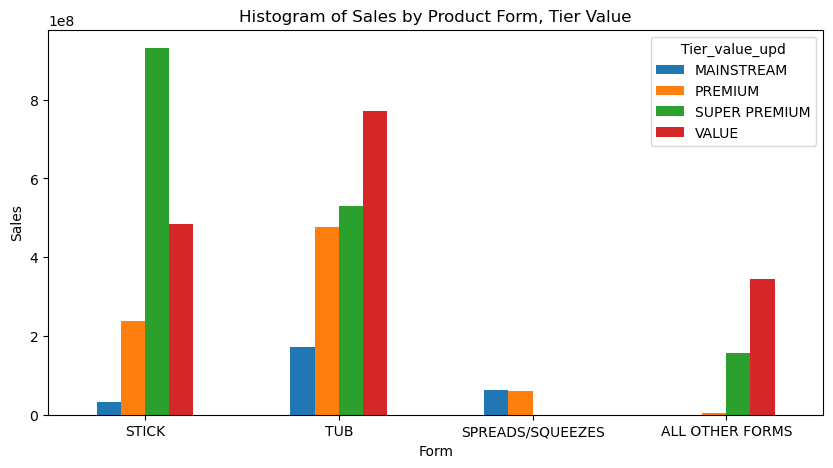

In [306]:

# Group the data by Product Form, Tier Value, and Geography
grouped_data = Dummy_upd_Top5.groupby(['Tier_value_upd', 'Form_upd'])['Total_Unit_Sales'].sum().reset_index()

# Pivot the data to create a table with Product Form as rows, Tier Value as columns, and Geography as values
pivoted_data = grouped_data.pivot(index='Form_upd', columns=['Tier_value_upd'], values='Total_Unit_Sales')

# Plot the histogram
fig, ax = plt.subplots(figsize=(10,5))
pivoted_data.plot(kind='bar', stacked=False, ax=ax)
ax.set_xticklabels(['STICK', 'TUB', 'SPREADS/SQUEEZES', 'ALL OTHER FORMS'], rotation=360)

ax.set_xlabel('Form')
ax.set_ylabel('Sales')
ax.set_title('Histogram of Sales by Product Form, Tier Value')
plt.show()


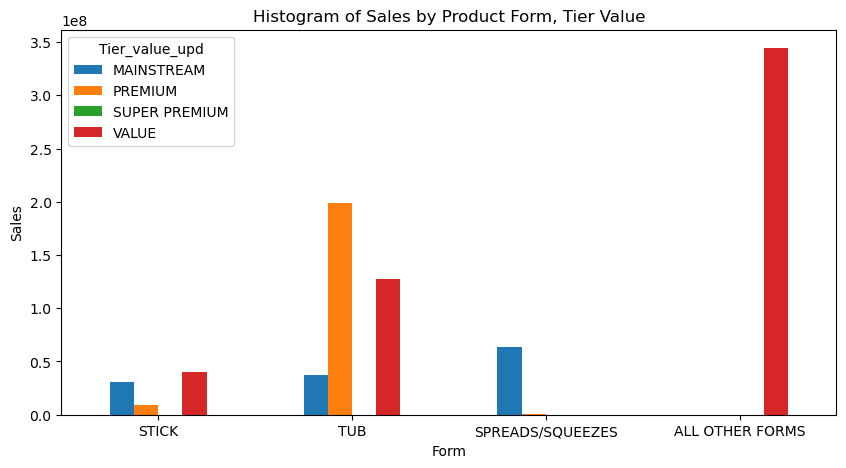

In [304]:
import matplotlib.pyplot as plt

# Group the data by Product Form, Tier Value, and Geography
grouped_data = Dummy_upd_Conagra.groupby(['Tier_value_upd', 'Form_upd'])['Total_Unit_Sales'].sum().reset_index()

# Pivot the data to create a table with Product Form as rows, Tier Value as columns, and Geography as values
pivoted_data = grouped_data.pivot(index='Form_upd', columns=['Tier_value_upd'], values='Total_Unit_Sales')

# Plot the histogram
fig, ax = plt.subplots(figsize=(10,5))
pivoted_data.plot(kind='bar', stacked=False, ax=ax)
ax.set_xticklabels(['STICK', 'TUB', 'SPREADS/SQUEEZES', 'ALL OTHER FORMS'], rotation=360)

ax.set_xlabel('Form')
ax.set_ylabel('Sales')
ax.set_title('Histogram of Sales by Product Form, Tier Value')
plt.show()


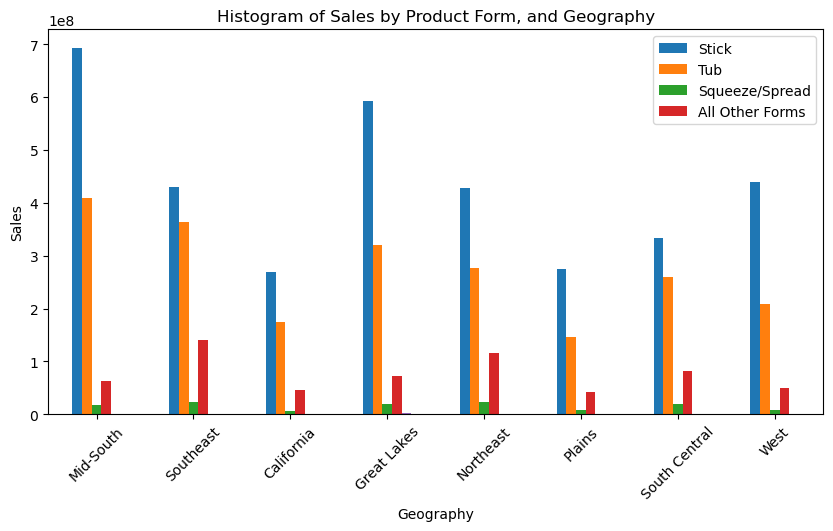

In [318]:

# Group the data by Product Form, Tier Value, and Geography
grouped_data = Dummy_upd.groupby(['Form_upd', 'Geo_upd'])['Total_Unit_Sales'].sum().reset_index()

# Pivot the data to create a table with Product Form as rows, Tier Value as columns, and Geography as values
pivoted_data = grouped_data.pivot(index='Geo_upd', columns=['Form_upd'], values='Total_Unit_Sales')

# Plot the histogram
fig, ax = plt.subplots(figsize=(10,5))
pivoted_data.plot(kind='bar', stacked=False, ax=ax, legend = True)
ax.set_xticklabels(['Mid-South', 'Southeast', 'California', 'Great Lakes', 'Northeast', 'Plains', 'South Central', 'West'], rotation=45)

ax.legend(['Stick', 'Tub', 'Squeeze/Spread', 'All Other Forms'])
#ax.legend.header(['Form'])

ax.set_xlabel('Geography')
ax.set_ylabel('Sales')
ax.set_title('Histogram of Sales by Product Form, and Geography')
plt.show()


In [320]:
count = Dummy_upd['CAG Manufacturer Value'].value_counts()
print(count)

PRIVATE LABEL                   306049
CONAGRA BRANDS                   94702
UPFIELD                          94404
LAND O'LAKES INC                 78636
CHALLENGE DAIRY PRODUCTS INC     36185
                                 ...  
KRIEMHILD DAIRY FARMS LLC            2
SWIFT & COMPANY                      2
ALLIANTI FOOD SERVICE INC            2
WEST LYNN CREAMERY INC               1
GUERNSEY FARMS DAIRY                 1
Name: CAG Manufacturer Value, Length: 321, dtype: int64


In [315]:


value_counts = filtered_df['CAG Form Value'].value_counts()
print(value_counts)

TUBS              47507
STICKS            28688
ALL OTHER FORM     2441
Name: CAG Form Value, dtype: int64


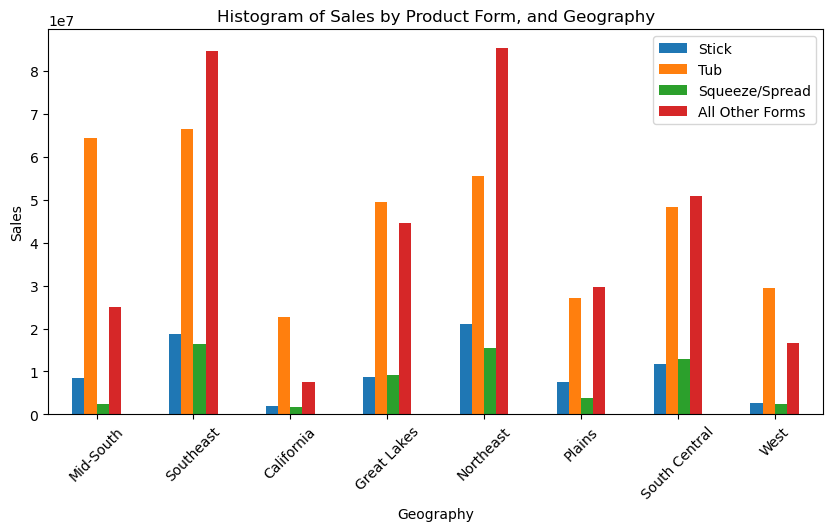

In [302]:

# Group the data by Product Form, Tier Value, and Geography
grouped_data = Dummy_upd_Conagra.groupby(['Form_upd', 'Geo_upd'])['Total_Unit_Sales'].sum().reset_index()

# Pivot the data to create a table with Product Form as rows, Tier Value as columns, and Geography as values
pivoted_data2 = grouped_data.pivot(index='Geo_upd', columns=['Form_upd'], values='Total_Unit_Sales')

# Plot the histogram
fig, ax = plt.subplots(figsize=(10,5))
pivoted_data2.plot(kind='bar', stacked=False, ax=ax, legend = True)
ax.set_xticklabels(['Mid-South', 'Southeast', 'California', 'Great Lakes', 'Northeast', 'Plains', 'South Central', 'West'], rotation=45)

ax.legend(['Stick', 'Tub', 'Squeeze/Spread', 'All Other Forms'])
#ax.legend.header(['Form'])

ax.set_xlabel('Geography')
ax.set_ylabel('Sales')
ax.set_title('Histogram of Sales by Product Form, and Geography')
plt.show()
